# We visualize here the data cluster for the Wall Street Data presented in the columns version


In [2]:
import h5py
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
%matplotlib inline
from visualization.data_clustering import visualize_data_cluster_text_to_image_columns

## First let's do it for the version with spaces

### Mixed Receptive Fields

In [3]:
# First we load the file 
file_location = '../results_database/text_wall_street_columns.hdf5'
run_name = '/test'
f = h5py.File(file_location, 'r')


In [4]:
# Nexa parameters
Nspatial_clusters = 3
Ntime_clusters = 3
Nembedding = 3

parameters_string = '/' + str(Nspatial_clusters)
parameters_string += '-' + str(Ntime_clusters)
parameters_string += '-' + str(Nembedding)

nexa = f[run_name + parameters_string]
cluster_to_index = nexa['cluster_to_index']

#### Let's see the receptive fields first

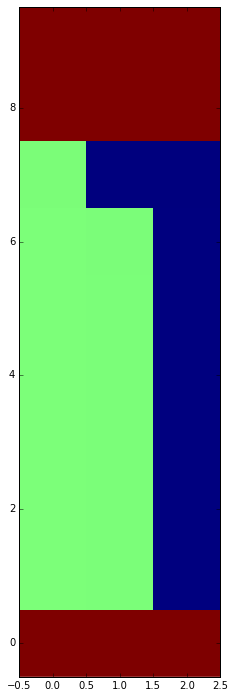

In [5]:
matrix = np.zeros((10, 3))

for cluster in cluster_to_index:
    
    cluster_indexes = cluster_to_index[str(cluster)]

    for index in cluster_indexes:
        first_index = index // 3
        second_index = index % 3
        matrix[first_index, second_index] = cluster

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.imshow(matrix, origin='lower', interpolation='none')

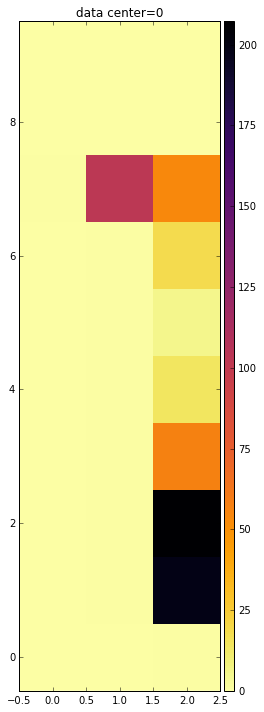

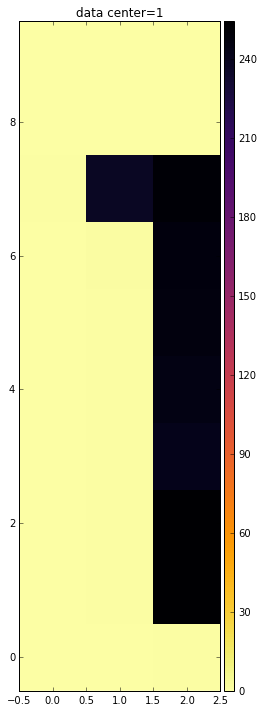

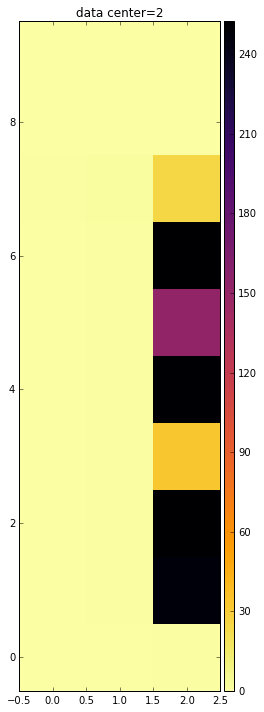

In [6]:
cluster = 0
for data_center in range(Ntime_clusters):
    fig = visualize_data_cluster_text_to_image_columns(nexa, f, run_name,
                                                       cluster, data_center, colorbar=True)

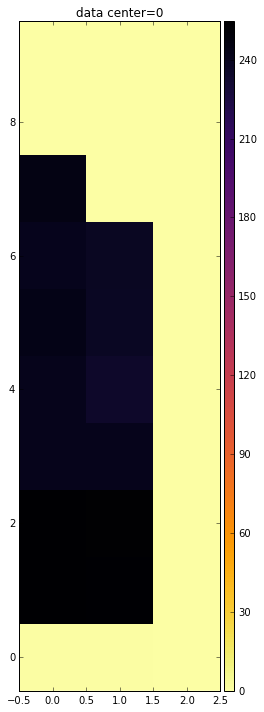

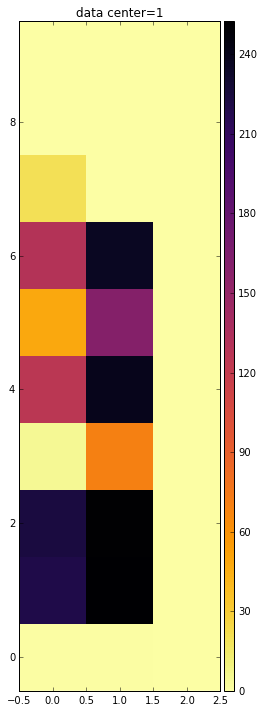

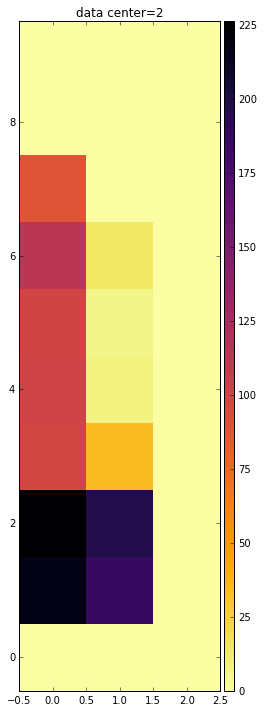

In [7]:
cluster = 1
for data_center in range(Ntime_clusters):
    fig = visualize_data_cluster_text_to_image_columns(nexa, f, run_name,
                                                       cluster, data_center, colorbar=True)

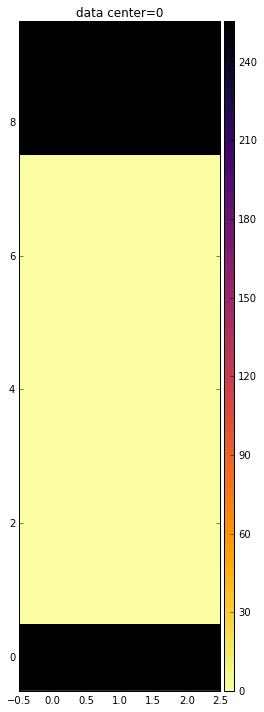

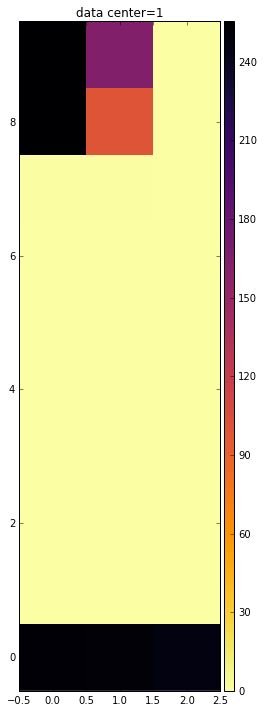

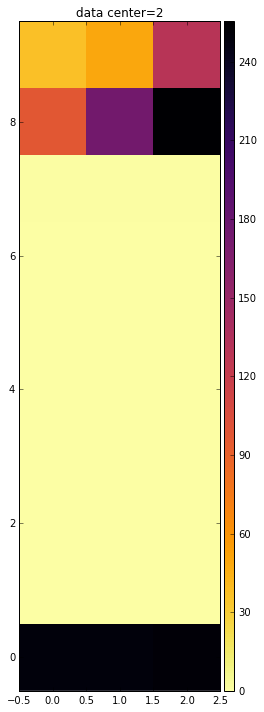

In [8]:
cluster = 2
for data_center in range(Ntime_clusters):
    fig = visualize_data_cluster_text_to_image_columns(nexa, f, run_name,
                                                       cluster, data_center, colorbar=True)

### Now for independent receptive fields

In [9]:
# First we load the file 
file_location = '../results_database/text_wall_street_columns.hdf5'
run_name = '/indep'
f = h5py.File(file_location, 'r')

In [10]:
# Nexa parameters
Nspatial_clusters = 3
Ntime_clusters = 3
Nembedding = 3

parameters_string = '/' + str(Nspatial_clusters)
parameters_string += '-' + str(Ntime_clusters)
parameters_string += '-' + str(Nembedding)

nexa = f[run_name + parameters_string]
cluster_to_index = nexa['cluster_to_index']

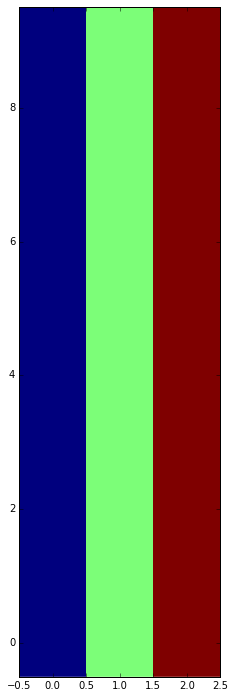

In [11]:
matrix = np.zeros((10, 3))

for cluster in cluster_to_index:
    
    cluster_indexes = cluster_to_index[str(cluster)]

    for index in cluster_indexes:
        first_index = index // 3
        second_index = index % 3
        matrix[first_index, second_index] = cluster

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.imshow(matrix, origin='lower', interpolation='none')

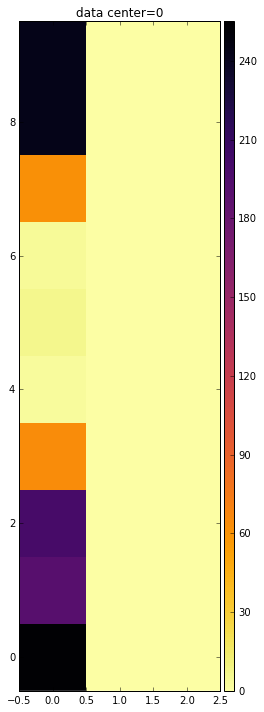

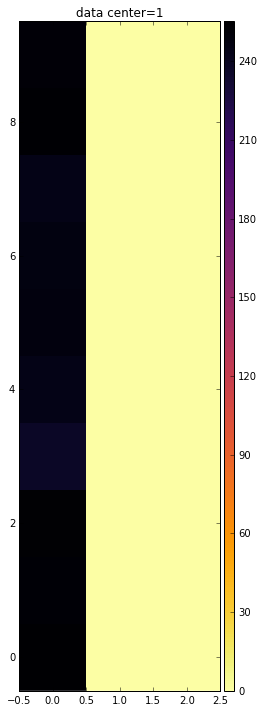

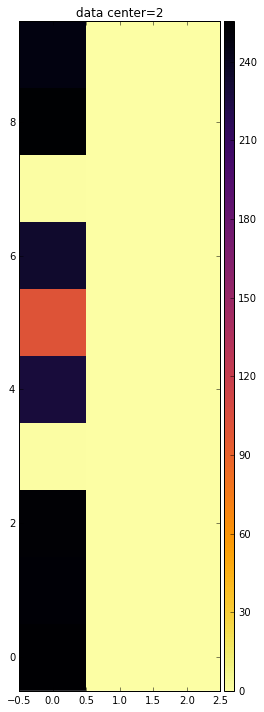

In [12]:
cluster = 0
for data_center in range(Ntime_clusters):
    fig = visualize_data_cluster_text_to_image_columns(nexa, f, run_name,
                                                       cluster, data_center, colorbar=True)

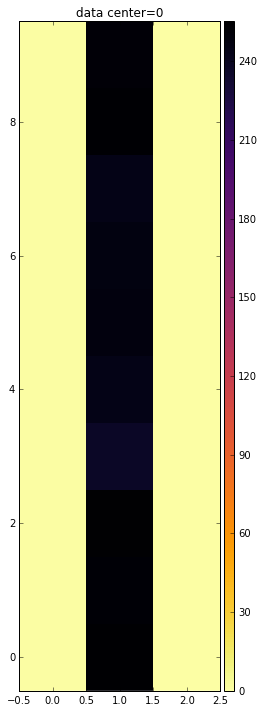

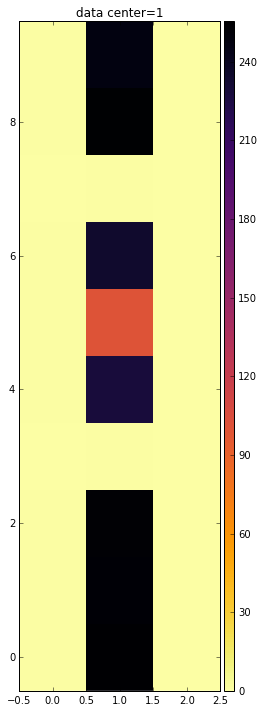

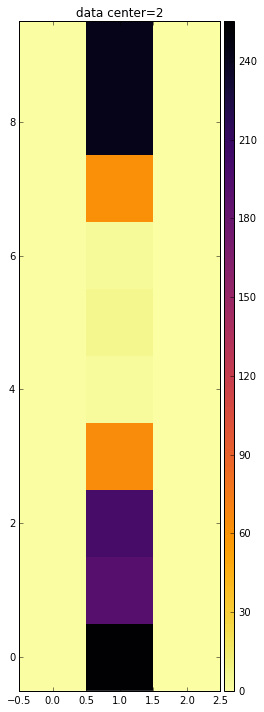

In [13]:
cluster = 1
for data_center in range(Ntime_clusters):
    fig = visualize_data_cluster_text_to_image_columns(nexa, f, run_name,
                                                       cluster, data_center, colorbar=True)

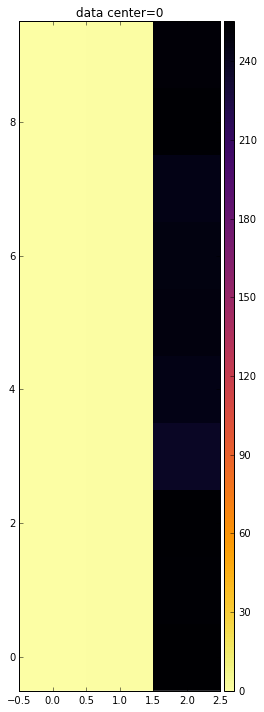

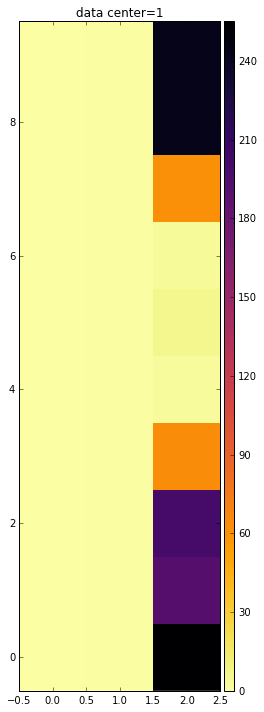

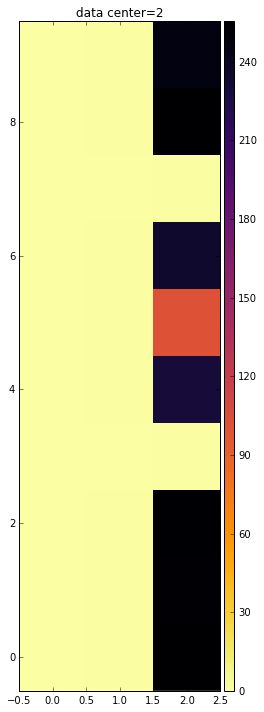

In [14]:
cluster = 2
for data_center in range(Ntime_clusters):
    fig = visualize_data_cluster_text_to_image_columns(nexa, f, run_name,
                                                       cluster, data_center, colorbar=True)

## Now let's do it for the version without spaces

### Mixed Receptive Fields

In [16]:
# First we load the file 
file_location = '../results_database/text_wall_street_columns_spaces.hdf5'
run_name = '/test'
f = h5py.File(file_location, 'r')

In [17]:
# Nexa parameters
Nspatial_clusters = 3
Ntime_clusters = 3
Nembedding = 3

parameters_string = '/' + str(Nspatial_clusters)
parameters_string += '-' + str(Ntime_clusters)
parameters_string += '-' + str(Nembedding)

nexa = f[run_name + parameters_string]
cluster_to_index = nexa['cluster_to_index']

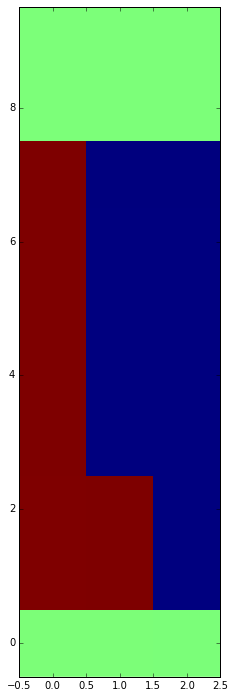

In [18]:
matrix = np.zeros((10, 3))

for cluster in cluster_to_index:
    
    cluster_indexes = cluster_to_index[str(cluster)]

    for index in cluster_indexes:
        first_index = index // 3
        second_index = index % 3
        matrix[first_index, second_index] = cluster

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.imshow(matrix, origin='lower', interpolation='none')

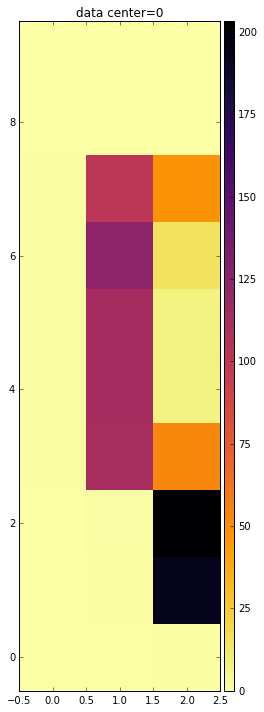

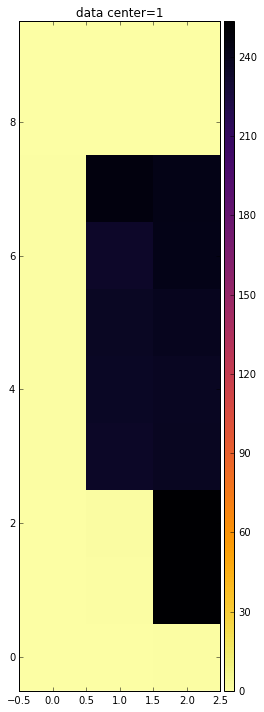

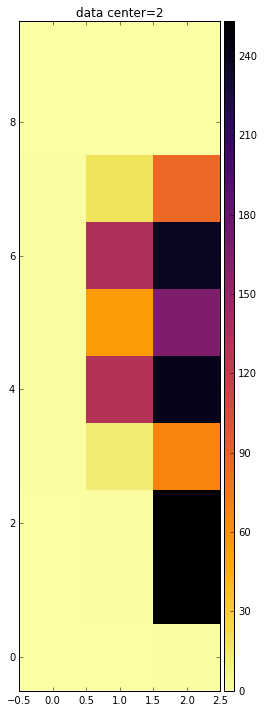

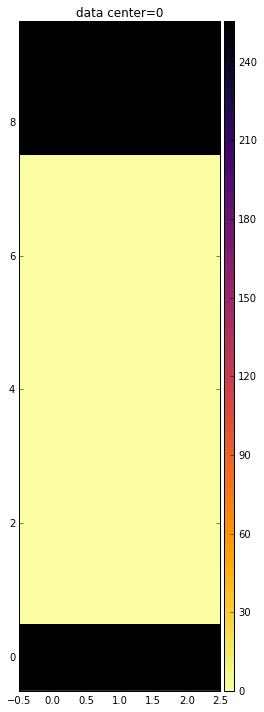

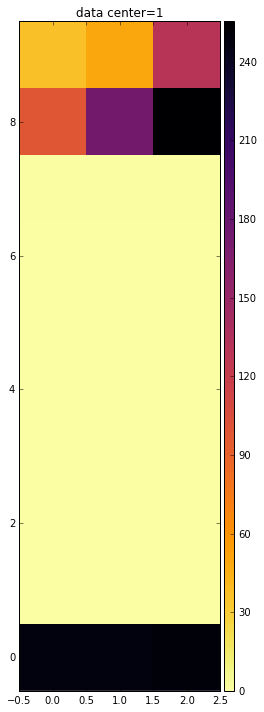

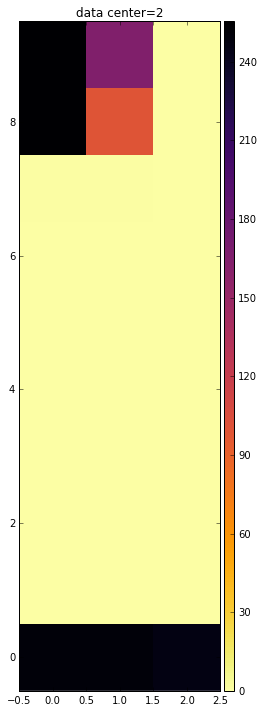

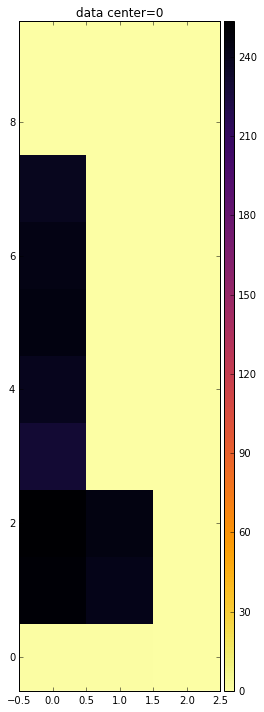

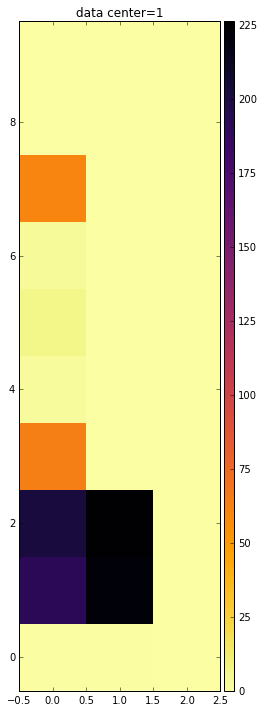

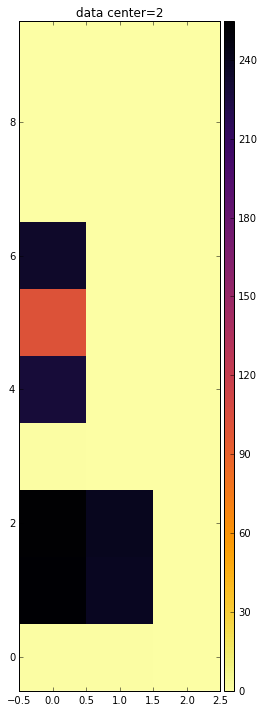

In [20]:
for cluster in range(3):
    for data_center in range(Ntime_clusters):
        fig = visualize_data_cluster_text_to_image_columns(nexa, f, run_name,
                                                       cluster, data_center, colorbar=True)

### Now for independent receptive fields

In [21]:
# First we load the file 
file_location = '../results_database/text_wall_street_columns_spaces.hdf5'
run_name = '/indep'
f = h5py.File(file_location, 'r')

In [22]:
# Nexa parameters
Nspatial_clusters = 3
Ntime_clusters = 3
Nembedding = 3

parameters_string = '/' + str(Nspatial_clusters)
parameters_string += '-' + str(Ntime_clusters)
parameters_string += '-' + str(Nembedding)

nexa = f[run_name + parameters_string]
cluster_to_index = nexa['cluster_to_index']

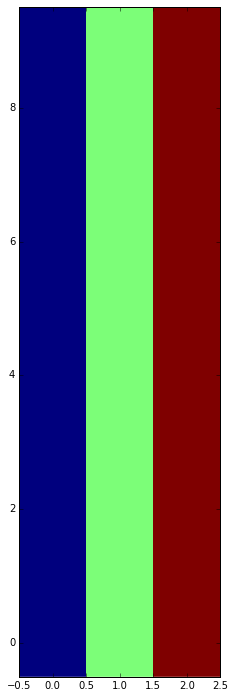

In [23]:
matrix = np.zeros((10, 3))

for cluster in cluster_to_index:
    
    cluster_indexes = cluster_to_index[str(cluster)]

    for index in cluster_indexes:
        first_index = index // 3
        second_index = index % 3
        matrix[first_index, second_index] = cluster

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.imshow(matrix, origin='lower', interpolation='none')

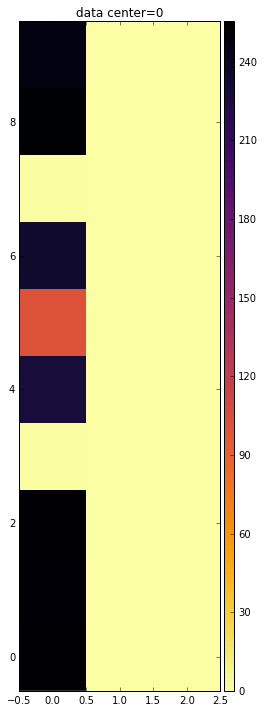

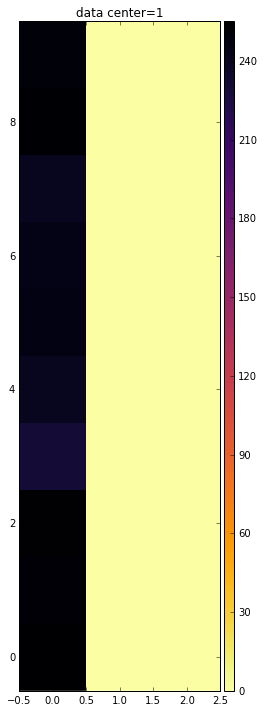

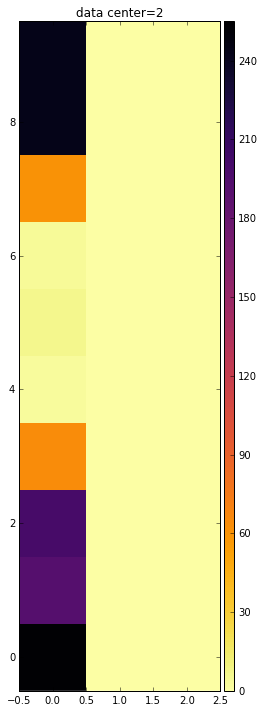

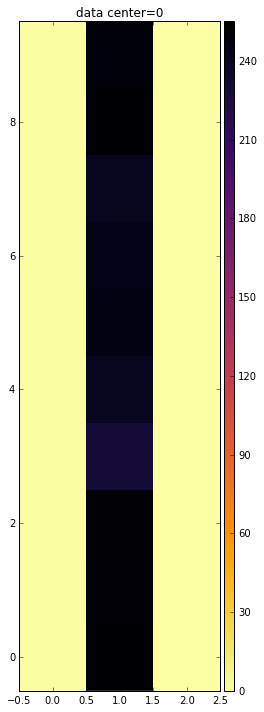

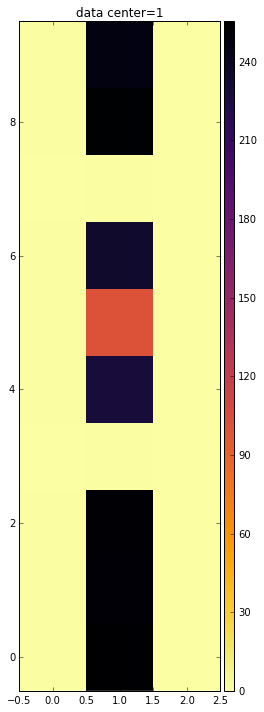

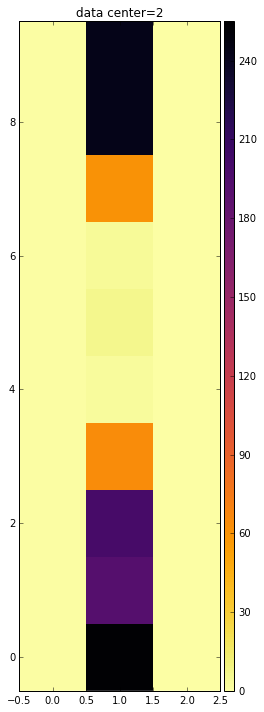

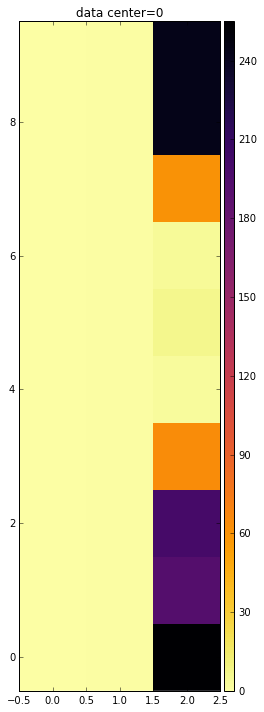

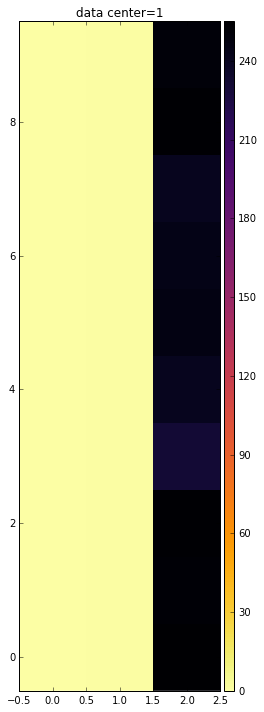

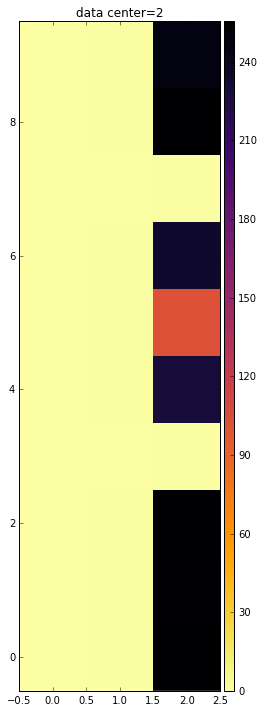

In [24]:
for cluster in range(3):
    for data_center in range(Ntime_clusters):
        fig = visualize_data_cluster_text_to_image_columns(nexa, f, run_name,
                                                       cluster, data_center, colorbar=True)